# Group Assignment TO Bike Share Analysis 

First let's read in the excel file to convert it into a dataframe.

Here are some questions I'd like to ask:
1. Which months do the most rides occur in 2014, 2015, 2016?
2. How many users are members and how many are casual?
3. What are the most frequent start times (is it at midnight, midday, evening)? What kind of distribution can we see for start times to graph?
4. Which days are the most frequent days and which are the least frequent days that users use the bike share? What type of distribution can we find for the days of the week to graph? 
5. Which is the most frequent start location? Which is the most frequent end location? Are there any distributions for these locations that we can graph?

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# This will ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Our temporal data types
from datetime import datetime
from datetime import timedelta

t2016Q4 = pd.read_excel('2016_Bike_Share_Toronto_Ridership_Q4.xlsx',\
                    names=['trip_id','start','end','duration','from','to','user_type'])

t2016Q3 = pd.read_excel('2016_Bike_Share_Toronto_Ridership_Q3.xlsx',
                       names=['trip_id','start','end','duration','from','to','user_type'])

## Clean the Data for Q4 and Q3 of 2016

In [94]:
t2016Q4['start'] = pd.to_datetime(t2016Q4['start'])
t2016Q3['start'] = pd.to_datetime(t2016Q3['start'])

In [95]:
t2016Q4['end'] = pd.to_datetime(t2016Q4['end'])
t2016Q3['end'] = pd.to_datetime(t2016Q3['end'])

In [96]:
t2016Q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217569 entries, 0 to 217568
Data columns (total 7 columns):
trip_id      217569 non-null int64
start        217569 non-null datetime64[ns]
end          217569 non-null datetime64[ns]
duration     217569 non-null int64
from         217567 non-null object
to           217567 non-null object
user_type    217569 non-null object
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 11.6+ MB


In [97]:
t2016Q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367962 entries, 0 to 367961
Data columns (total 7 columns):
trip_id      367962 non-null int64
start        367962 non-null datetime64[ns]
end          367962 non-null datetime64[ns]
duration     367962 non-null int64
from         367959 non-null object
to           367960 non-null object
user_type    367962 non-null object
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 19.7+ MB


In [98]:
t2016Q4[['start','end']].head()

,start,end
0,2016-01-10 00:00:00,2016-01-10 00:07:00
1,2016-01-10 00:00:00,2016-01-10 00:09:00
2,2016-01-10 00:00:00,2016-01-10 00:07:00
3,2016-01-10 00:01:00,2016-01-10 00:27:00
4,2016-01-10 00:01:00,2016-01-10 00:27:00


In [99]:
t2016Q3[['start','end']].head()

,start,end
0,2016-07-09 01:03:00,2016-07-09 01:15:00
1,2016-07-09 02:15:00,2016-07-09 02:22:00
2,2016-07-10 17:04:00,2016-07-10 17:36:00
3,2016-07-11 01:45:00,2016-07-11 01:58:00
4,2016-07-18 13:35:00,2016-07-18 13:42:00


In [100]:
#For start times of Q4 - Clean the datetime values

mask = (pd.PeriodIndex(t2016Q4['start'],freq='Q') != '2016Q4') #get all values that are not within the 
                                                                #2016 Q4 range
s = pd.DatetimeIndex(t2016Q4.loc[mask,'start'].dt.strftime('%Y-%d-%m %H:%M:%S')) #
t2016Q4.loc[mask,'start'] = pd.to_datetime(s)

In [101]:
#For end times of Q4 - Clean the datetime values
mask = (pd.PeriodIndex(t2016Q4['end'],freq='Q') != '2016Q4')
s = pd.DatetimeIndex(t2016Q4.loc[mask,'end'].dt.strftime('%Y-%d-%m %H:%M:%S'))
t2016Q4.loc[mask,'end'] = pd.to_datetime(s)

In [102]:
t2016Q4[['start','end']].head()

,start,end
0,2016-10-01 00:00:00,2016-10-01 00:07:00
1,2016-10-01 00:00:00,2016-10-01 00:09:00
2,2016-10-01 00:00:00,2016-10-01 00:07:00
3,2016-10-01 00:01:00,2016-10-01 00:27:00
4,2016-10-01 00:01:00,2016-10-01 00:27:00


In [103]:
#For start times of Q3 - Clean the datetime values
mask = (pd.PeriodIndex(t2016Q3['start'],freq='Q') != '2016Q3') #get all values that are not within the 
                                                                #2016 Q4 range
s = pd.DatetimeIndex(t2016Q3.loc[mask,'start'].dt.strftime('%Y-%d-%m %H:%M:%S')) #
t2016Q3.loc[mask,'start'] = pd.to_datetime(s)

In [104]:
#For end times of Q3 - Clean the datetime values
mask = (pd.PeriodIndex(t2016Q3['end'],freq='Q') != '2016Q3')
s = pd.DatetimeIndex(t2016Q3.loc[mask,'end'].dt.strftime('%Y-%d-%m %H:%M:%S'))
t2016Q3.loc[mask,'end'] = pd.to_datetime(s)

In [105]:
t2016Q3[t2016Q3.start.dt.year == 2000]

,trip_id,start,end,duration,from,to,user_type
365004,622515,2000-01-01 14:40:00,2000-01-01 15:44:00,3794,Front St / Yonge St (Hockey Hall of Fame),Front St / Yonge St (Hockey Hall of Fame),Member


In [14]:
anomaly = t2016Q3[t2016Q3.start.dt.year == 2000]
anomaly
t2016Q3.drop(anomaly.index, axis='rows',inplace=True)
t2016Q3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367961 entries, 0 to 367961
Data columns (total 7 columns):
trip_id      367961 non-null int64
start        367961 non-null datetime64[ns]
end          367961 non-null datetime64[ns]
duration     367961 non-null int64
from         367958 non-null object
to           367959 non-null object
user_type    367961 non-null object
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 22.5+ MB


In [106]:
(t2016Q3[t2016Q3.start.dt.year == 2000])

,trip_id,start,end,duration,from,to,user_type
365004,622515,2000-01-01 14:40:00,2000-01-01 15:44:00,3794,Front St / Yonge St (Hockey Hall of Fame),Front St / Yonge St (Hockey Hall of Fame),Member


## Q1: Which months in 2016 had most rides?

### Q4 2016

In [107]:
t2016Q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217569 entries, 0 to 217568
Data columns (total 7 columns):
trip_id      217569 non-null int64
start        217569 non-null datetime64[ns]
end          217569 non-null datetime64[ns]
duration     217569 non-null int64
from         217567 non-null object
to           217567 non-null object
user_type    217569 non-null object
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 11.6+ MB


In [108]:
t2016Q4.head()

,trip_id,start,end,duration,from,to,user_type
0,462305,2016-10-01 00:00:00,2016-10-01 00:07:00,394,Queens Quay W / Dan Leckie Way,Fort York Blvd / Garrison Rd,Casual
1,462306,2016-10-01 00:00:00,2016-10-01 00:09:00,533,Sherbourne St / Wellesley St,Edward St / Yonge St,Member
2,462307,2016-10-01 00:00:00,2016-10-01 00:07:00,383,Queens Quay W / Dan Leckie Way,Fort York Blvd / Garrison Rd,Casual
3,462308,2016-10-01 00:01:00,2016-10-01 00:27:00,1557,Cherry St / Distillery Ln,Fort York Blvd / Capreol Crt,Casual
4,462309,2016-10-01 00:01:00,2016-10-01 00:27:00,1547,Cherry St / Distillery Ln,Fort York Blvd / Capreol Crt,Casual


In [109]:
t2016Q4['start_month'] = t2016Q4.start.dt.month_name()
t2016Q4.head()

,trip_id,start,end,duration,from,to,user_type,start_month
0,462305,2016-10-01 00:00:00,2016-10-01 00:07:00,394,Queens Quay W / Dan Leckie Way,Fort York Blvd / Garrison Rd,Casual,October
1,462306,2016-10-01 00:00:00,2016-10-01 00:09:00,533,Sherbourne St / Wellesley St,Edward St / Yonge St,Member,October
2,462307,2016-10-01 00:00:00,2016-10-01 00:07:00,383,Queens Quay W / Dan Leckie Way,Fort York Blvd / Garrison Rd,Casual,October
3,462308,2016-10-01 00:01:00,2016-10-01 00:27:00,1557,Cherry St / Distillery Ln,Fort York Blvd / Capreol Crt,Casual,October
4,462309,2016-10-01 00:01:00,2016-10-01 00:27:00,1547,Cherry St / Distillery Ln,Fort York Blvd / Capreol Crt,Casual,October


In [110]:
t2016Q4_grp = t2016Q4.groupby(['start_month']).count()
t2016Q4_grp
#t2016Q4_grp.sort_values(by=['start_month'],ascending=False)

,trip_id,start,end,duration,from,to,user_type
start_month,,,,,,,
December,41605,41605,41605,41605,41605,41605,41605
November,78666,78666,78666,78666,78666,78666,78666
October,97298,97298,97298,97298,97296,97296,97298


### Q3 2016 

In [111]:
t2016Q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367962 entries, 0 to 367961
Data columns (total 7 columns):
trip_id      367962 non-null int64
start        367962 non-null datetime64[ns]
end          367962 non-null datetime64[ns]
duration     367962 non-null int64
from         367959 non-null object
to           367960 non-null object
user_type    367962 non-null object
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 19.7+ MB


In [112]:
t2016Q3.head()

,trip_id,start,end,duration,from,to,user_type
0,53279,2016-07-09 01:03:00,2016-07-09 01:15:00,714,Dundas St E / Regent Park Blvd,Danforth Ave / Ellerbeck St,Member
1,53394,2016-07-09 02:15:00,2016-07-09 02:22:00,417,Riverdale Park North (Broadview Ave),Dundas St E / Regent Park Blvd,Member
2,58314,2016-07-10 17:04:00,2016-07-10 17:36:00,1904,Dundas St E / Regent Park Blvd,Queen St W / Close Ave,Member
3,60784,2016-07-11 01:45:00,2016-07-11 01:58:00,784,Union Station,Dundas St E / Regent Park Blvd,Member
4,93164,2016-07-18 13:35:00,2016-07-18 13:42:00,443,Front St W / Blue Jays Way,Front St / Yonge St (Hockey Hall of Fame),Member


In [113]:
t2016Q3['start_month'] = t2016Q3.start.dt.month_name()

In [114]:
t2016Q3.head()

,trip_id,start,end,duration,from,to,user_type,start_month
0,53279,2016-07-09 01:03:00,2016-07-09 01:15:00,714,Dundas St E / Regent Park Blvd,Danforth Ave / Ellerbeck St,Member,July
1,53394,2016-07-09 02:15:00,2016-07-09 02:22:00,417,Riverdale Park North (Broadview Ave),Dundas St E / Regent Park Blvd,Member,July
2,58314,2016-07-10 17:04:00,2016-07-10 17:36:00,1904,Dundas St E / Regent Park Blvd,Queen St W / Close Ave,Member,July
3,60784,2016-07-11 01:45:00,2016-07-11 01:58:00,784,Union Station,Dundas St E / Regent Park Blvd,Member,July
4,93164,2016-07-18 13:35:00,2016-07-18 13:42:00,443,Front St W / Blue Jays Way,Front St / Yonge St (Hockey Hall of Fame),Member,July


## Combine the two datasets 

In [24]:
Q3Q4 = pd.concat([t2016Q3,t2016Q4])
Q3Q4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585530 entries, 0 to 217568
Data columns (total 8 columns):
trip_id        585530 non-null int64
start          585530 non-null datetime64[ns]
end            585530 non-null datetime64[ns]
duration       585530 non-null int64
from           585525 non-null object
to             585526 non-null object
user_type      585530 non-null object
start_month    585530 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 40.2+ MB


In [71]:
TObike = t2016Q3.append(t2016Q4)

In [26]:
Q3Q4_sorted = Q3Q4.sort_values(by=['monthnum'])
Q3Q4_sorted.head()

,trip_id,start,end,duration,from,to,user_type,start_month,monthnum
0,53279,2016-07-09 01:03:00,2016-07-09 01:15:00,714,Dundas St E / Regent Park Blvd,Danforth Ave / Ellerbeck St,Member,July,7
113490,84604,2016-07-16 17:10:00,2016-07-16 17:19:00,509,Queen St W / Portland St,Simcoe St / Queen St W,Member,July,7
113491,39782,2016-07-05 21:27:00,2016-07-05 21:40:00,801,Simcoe St / Dundas St W,Fort York Blvd / Capreol Crt,Member,July,7
113492,42112,2016-07-06 13:16:00,2016-07-06 13:28:00,743,Fort York Blvd / Capreol Crt,Simcoe St / Dundas St W,Member,July,7
113493,46270,2016-07-07 13:14:00,2016-07-07 13:27:00,733,Fort York Blvd / Capreol Crt,Simcoe St / Dundas St W,Member,July,7


In [27]:
Q3Q4_grp = Q3Q4_sorted.groupby(['monthnum','user_type']).count()
Q3Q4_grp

trip_id  start    end  duration   from     to  start_month
monthnum user_type                                                            
7        Casual       41366  41366  41366     41366  41366  41366        41366
         Member       66018  66018  66018     66018  66018  66018        66018
8        Casual       45960  45960  45960     45960  45960  45960        45960
         Member       84477  84477  84477     84477  84477  84477        84477
9        Casual       35158  35158  35158     35158  35157  35157        35158
         Member       94982  94982  94982     94982  94980  94981        94982
10       Casual       16770  16770  16770     16770  16769  16769        16770
         Member       80528  80528  80528     80528  80527  80527        80528
11       Casual        7050   7050   7050      7050   7050   7050         7050
         Member       71616  71616  71616     71616  71616  71616        71616
12       Casual        2534   2534   2534      2534   2534   2534         2534
         Member       39071  39071  39071     39071  39071  39071        39071

In [28]:
#plt.style.use(style='seaborn')

#n_grp = Q3Q4_grp['']
Y = Q3Q4_grp['start'].unstack() #This will separate Casual vs Member based on start time counts
Y
#X = np.arange() 
#fig, ax = plt.subplots(figsize=(20,10))

#Q3Q4_grp['start'].unstack().plot(kind='bar')

user_type,Casual,Member
monthnum,,
7,41366,66018
8,45960,84477
9,35158,94982
10,16770,80528
11,7050,71616
12,2534,39071


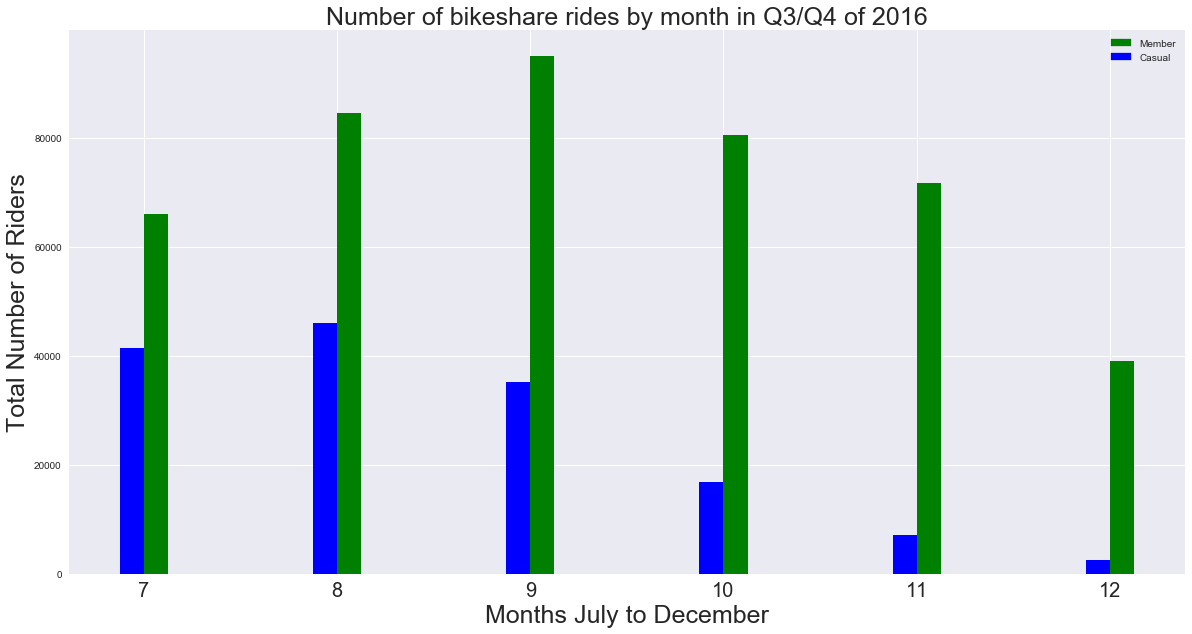

In [29]:
import matplotlib.patches as mpatches
plt.style.use(style='seaborn')
fig, ax = plt.subplots(figsize=(20,10))

n_grp = Q3Q4_grp['start'].unstack().Casual.size
x_pos = np.arange(n_grp)

width = 0.25

ax.set(xticks=x_pos+width/4,xticklabels=Q3Q4_grp.unstack().index)

ax.set_title('Number of bikeshare rides by month in Q3/Q4 of 2016', fontsize=25)
ax.set_xlabel('Months July to December', fontsize=25)
ax.set_xticklabels(Q3Q4_grp.unstack().index,fontdict={'fontsize':20})
ax.set_ylabel('Total Number of Riders', fontsize=25)

#Patches
green_patch = mpatches.Patch(color='green',label='Member')
blue_patch = mpatches.Patch(color='blue',label='Casual')

ax.bar(x_pos, Q3Q4_grp['start'].unstack().Casual, width/2, color='blue',\
       align='center',label='months')
ax.bar(x_pos+width/2, Q3Q4_grp['start'].unstack().Member, width/2, color='green',\
       align='center',label='months')
plt.legend(handles=[green_patch,blue_patch])
plt.show();

## Machine Learning - Training model to check whether Member or Casual 

X = Months
Y = Member/Casual Rider Count

In [30]:
Yc = Q3Q4_grp['start'].unstack().Casual
Ym = Q3Q4_grp['start'].unstack().Member
X = np.arange(Q3Q4_grp['start'].unstack().Casual.size)

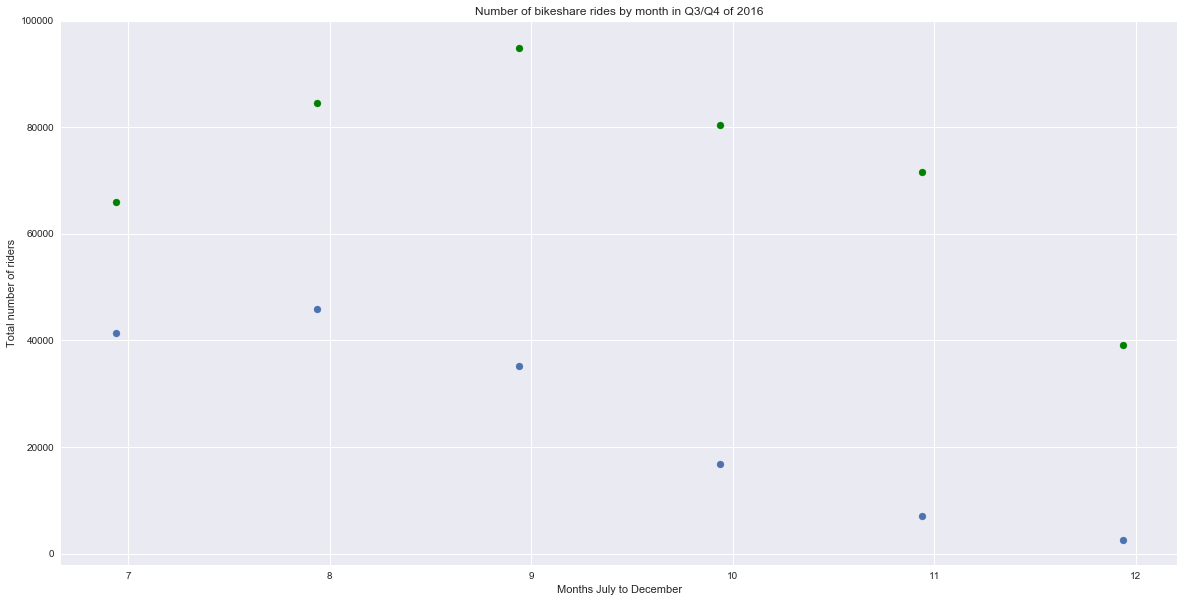

In [31]:
f, ax = plt.subplots(figsize=(20,10))

ax.set(title='Number of bikeshare rides by month in Q3/Q4 of 2016',\
      xticks=x_pos+width/4,\
      xticklabels=Q3Q4_grp.unstack().index,\
      xlabel='Months July to December',\
      ylabel='Total number of riders')

ax.scatter(X,Yc,label='Casual')
ax.scatter(X,Ym,label='Member',color='green');

/Users/Jack/anaconda3/envs/Data_Science/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


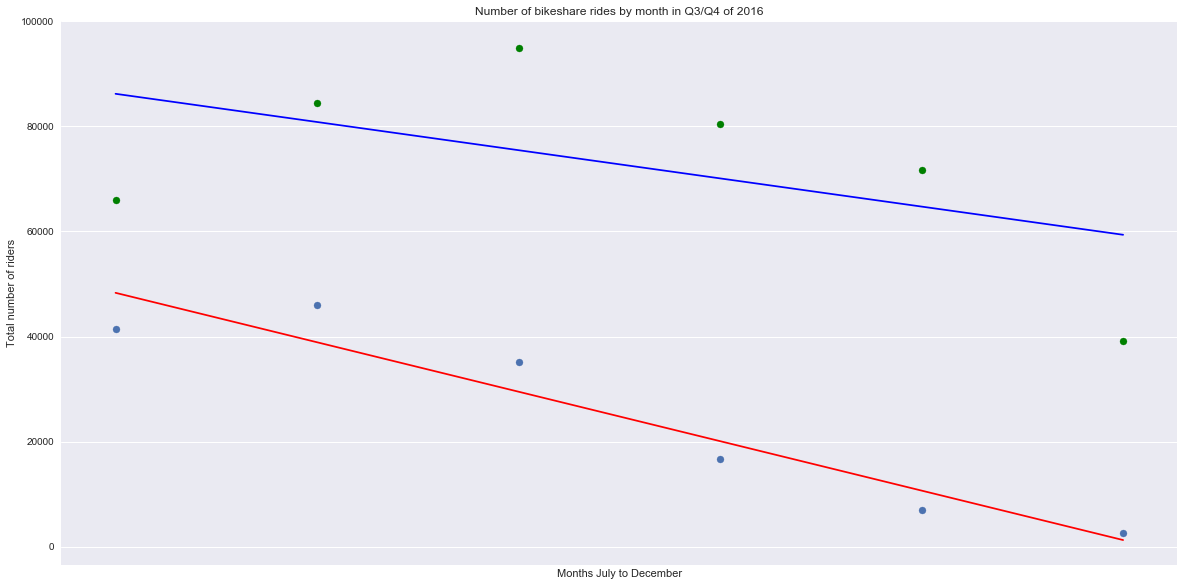

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

#First model - Linear Regression Model
#Step 1 - Get the variables
X = Q3Q4_grp.unstack().index.values.reshape(-1,1)
Yc = Q3Q4_grp['start'].unstack().Casual
Ym = Q3Q4_grp['start'].unstack().Member

#Step 2 - Train the model you want
lin_modelc = LinearRegression().fit(X,Yc)
lin_modelm = LinearRegression().fit(X,Ym)

#Step 3 - Test the model by plotting the regression line
f, ax = plt.subplots(figsize=(20,10))

ax.set(title='Number of bikeshare rides by month in Q3/Q4 of 2016',\
      xticks=x_pos+width/4,\
      xticklabels=Q3Q4_grp.unstack().index,\
      xlabel='Months July to December',\
      ylabel='Total number of riders')

ax.scatter(X,Yc,label='Casual')
ax.plot(X,lin_modelc.predict(X),color='r')
ax.scatter(X,Ym,label='Member',color='green')
ax.plot(X,lin_modelm.predict(X),color='b');

# Q2: Bikeshare Members vs Casual Users


In [44]:
TObike.start = pd.to_datetime(TObike.start)
TObike.end = pd.to_datetime(TObike.end)

In [45]:
TObike.start = TObike.start.dt.date
TObike.end = TObike.end.dt.date

In [47]:
TObike_grouped = TObike.groupby('user_type')
TObike_Member = TObike_grouped.get_group('Member')
TObike_Casual = TObike_grouped.get_group('Casual')

In [48]:
TObike_Member_CountByDate = TObike_Member['start'].value_counts()

In [49]:
TObike_Casual_CountByDate = TObike_Casual['end'].value_counts()

In [50]:
TObike_Member_CountByDate = TObike_Member_CountByDate[:-1]
TObike_Member_CountByDate

2016-09-20    4199
2016-09-22    4191
2016-10-04    4169
2016-10-05    4141
2016-09-15    4121
2016-09-14    4104
2016-09-16    4102
2016-09-28    4068
2016-09-21    4058
2016-10-06    4047
2016-09-13    4011
2016-12-10    3976
2016-10-18    3961
2016-09-19    3905
2016-10-19    3903
2016-09-27    3877
2016-09-09    3864
2016-10-14    3738
2016-10-07    3732
2016-09-30    3729
2016-09-12    3703
2016-10-13    3680
2016-09-23    3601
2016-10-03    3543
2016-08-17    3436
2016-08-24    3425
2016-08-30    3364
2016-08-31    3364
2016-08-23    3364
2016-08-18    3362
              ... 
2016-07-09    1336
2016-07-10    1332
2016-10-09    1289
2016-11-27    1249
2016-12-23    1168
2016-10-10    1140
2016-12-04    1133
2016-12-21    1126
2016-07-31    1112
2016-10-12    1111
2016-12-22    1078
2016-12-20     968
2016-07-03     928
2016-07-02     921
2016-11-20     917
2016-12-12     902
2016-07-01     825
2016-12-15     821
2016-12-19     782
2016-12-30     768
2016-12-16     768
2016-12-28  

In [51]:
TObike_Casual_CountByDate = TObike_Casual_CountByDate[:-1]
TObike_Casual_CountByDate

2016-09-04    3052
2016-09-05    2554
2016-08-07    2443
2016-08-06    2334
2016-08-21    2286
2016-08-20    2271
2016-07-17    2260
2016-07-30    2260
2016-07-16    2254
2016-09-03    2240
2016-08-27    2236
2016-08-01    2195
2016-08-28    1932
2016-07-10    1898
2016-07-24    1856
2016-08-14    1712
2016-07-23    1701
2016-09-18    1668
2016-09-24    1666
2016-07-03    1627
2016-08-08    1623
2016-07-02    1552
2016-09-25    1542
2016-07-09    1506
2016-08-02    1486
2016-09-11    1462
2016-07-31    1437
2016-08-24    1433
2016-08-23    1430
2016-08-15    1425
              ... 
2016-12-07      68
2016-10-27      68
2016-11-22      66
2016-12-05      61
2016-12-09      60
2016-11-23      56
2016-12-31      51
2016-12-08      50
2016-10-12      48
2016-12-30      46
2016-12-24      44
2016-12-14      38
2016-12-29      37
2016-11-21      37
2016-12-22      35
2016-11-12      34
2016-12-23      30
2016-12-28      27
2016-12-19      25
2016-12-13      22
2016-12-21      21
2016-12-27  

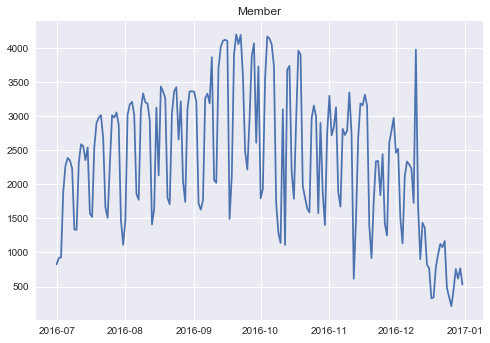

In [52]:
TObike_Member_CountByDate.plot(title = 'Member')

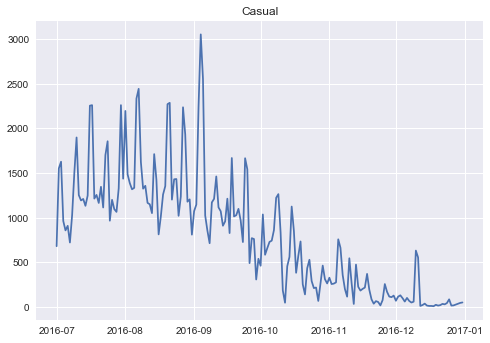

In [53]:
TObike_Casual_CountByDate.plot(title = 'Casual')

In [54]:
time = TObike[['duration','user_type']]
time_group = time.groupby('user_type')

In [55]:
time_Member = time_group.get_group('Member')
time_Casual = time_group.get_group('Casual')

In [56]:
time_Member.duration.sort_values

<bound method Series.sort_values of 0          714
1          417
2         1904
3          784
4          443
5          765
6          949
7          213
8          658
9         1163
10         718
11         694
12         501
13         363
14         707
15         317
16         609
17         644
18        1103
19         633
20        1303
21         658
22         914
23         595
24        1116
25         731
26         713
27        1309
28        1234
29        1122
          ... 
217535     775
217536     925
217537     637
217540     764
217541     128
217542     673
217543     721
217544     344
217545     304
217546    2520
217547     781
217548     499
217550     332
217551    1177
217552     207
217553     689
217554     654
217555     313
217556     503
217557     132
217558     422
217559     420
217561    1468
217562    1105
217563     410
217564     824
217565     478
217566     271
217567    1253
217568     478
Name: duration, Length: 436692, dtype: int64>

In [57]:
time_group.mean()

,duration
user_type,
Casual,1748.612115
Member,676.042410


user_type
Casual    AxesSubplot(0.125,0.125;0.775x0.755)
Member    AxesSubplot(0.125,0.125;0.775x0.755)
Name: duration, dtype: object

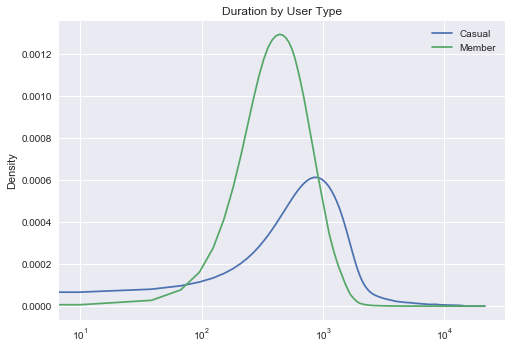

In [58]:
time.groupby('user_type').duration.plot(kind = 'kde', legend = 'reverse', title = 'Duration by User Type',logx = True)

In [61]:
TObike.start = pd.to_datetime(TObike.start)

In [62]:
TObike['weekday'] = TObike.start.dt.weekday_name

In [63]:
TObike_weekday = TObike[['weekday','user_type']]

In [64]:
TObike_weekday_groupby  = TObike_weekday.groupby('user_type')

In [65]:
TObike_weekday_member = TObike_weekday_groupby.get_group('Member')
TObike_weekday_casual = TObike_weekday_groupby.get_group('Casual')

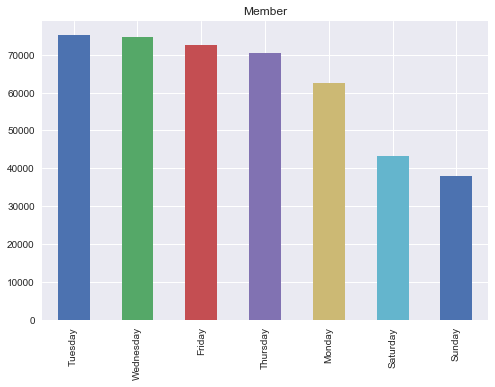

In [66]:
TObike_weekday_member['weekday'].value_counts().plot(kind = 'bar', title = 'Member')

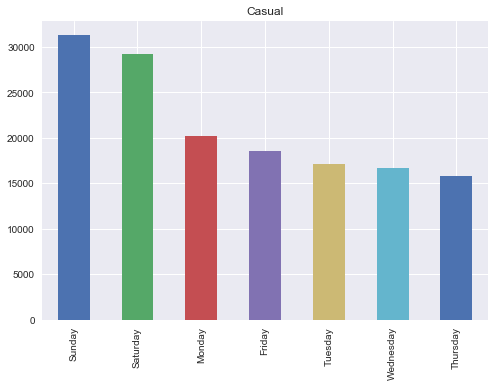

In [67]:
TObike_weekday_casual['weekday'].value_counts().plot(kind = 'bar', title = 'Casual')

# Q3: Frequency Distribution of Bike Rides by Time of Day 


In [72]:
TObike['trip_hour'] = TObike.start.dt.hour

hour_analysis = TObike.groupby('trip_hour')['duration'].agg(['sum', 'mean', 'count']).reset_index()

#toBike.tail(20)

In [73]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
#plt.rcParams['figure.figsize'] = (30, 20)
%matplotlib inline

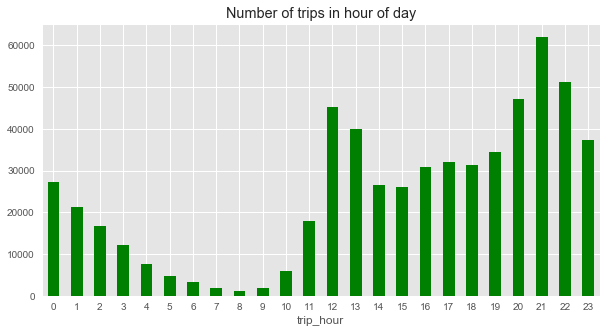

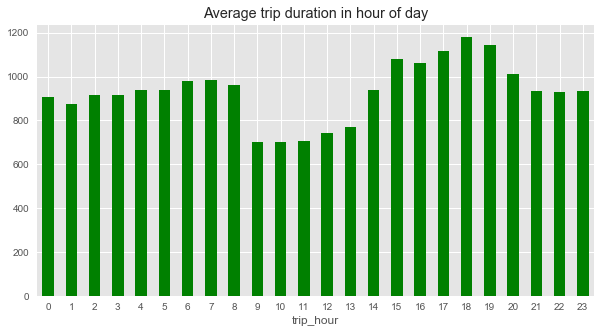

In [74]:
hour_analysis.plot(x='trip_hour', y='count', kind='bar', legend=False, color = 'g', 
                  rot=0, figsize=(10, 5), title = 'Number of trips in hour of day');

hour_analysis.plot(x='trip_hour', y='mean', kind='bar', legend=False, color = 'g', 
                  rot=0, figsize=(10, 5), title = 'Average trip duration in hour of day');

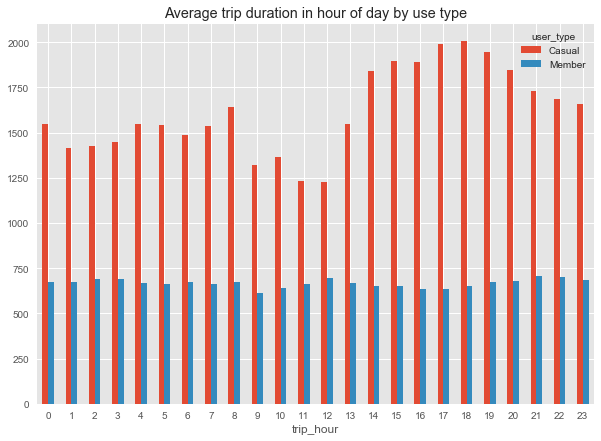

In [75]:
type_hour = pd.crosstab(TObike.trip_hour, TObike.user_type, values=TObike.duration, aggfunc="mean")
type_hour.plot(kind='bar', stacked=False, rot = 0, figsize=(10, 7), title = 'Average trip duration in hour of day by use type');

# Q4: Frequency Distribution of Bike Rides by Day

In [76]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
from dateutil.parser import parse

In [90]:
plt.style.use(style='ggplot')

In [116]:
datesQ3 = t2016Q3['start']
daysQ3 = []
datesQ4 = t2016Q4['start']
daysQ4 = []

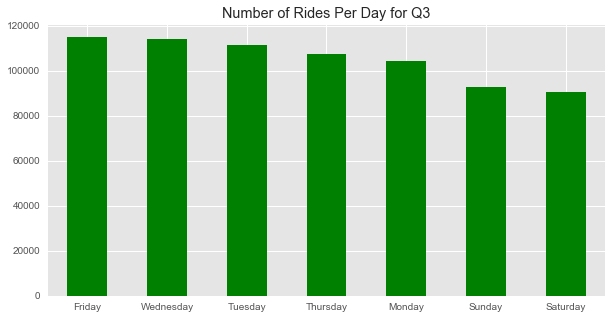

In [118]:

for i in range(len(datesQ3)):
    day = datesQ3[i].strftime("%A")
    daysQ3.append(day)
    
for i in range(len(datesQ4)):
    if type(datesQ4[i]) == str:
        datesQ4[i] = datetime.datetime.strptime(str(datesQ4[i]), '%d/%m/%Y %H:%M')
    day = datesQ4[i].strftime("%A")
    daysQ4.append(day)

days_dfQ3 = pd.Series(daysQ3)
day_countQ3 = days_dfQ3.value_counts()
day_countQ3.plot(x='Day', y='Rides', kind='bar', legend=False, color = 'g', 
                  rot=0, figsize=(10, 5), title = 'Number of Rides Per Day for Q3')

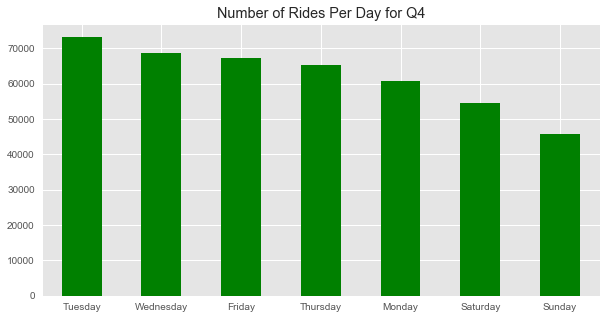

In [119]:
days_dfQ4 = pd.Series(daysQ4)
day_countQ4 = days_dfQ4.value_counts()
day_countQ4.plot(x='Day', y='Rides', kind='bar', legend=False, color = 'g', 
                  rot=0, figsize=(10, 5), title = 'Number of Rides Per Day for Q4')

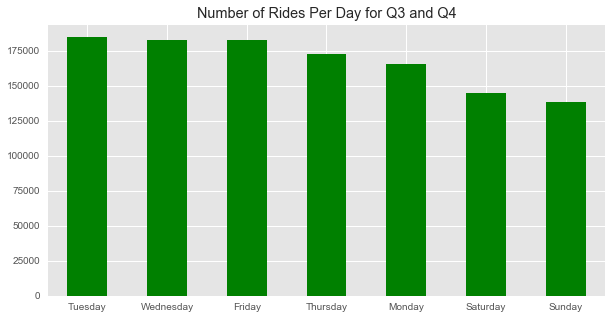

In [120]:
days_all= days_dfQ3.append(days_dfQ4)
day_count = days_all.value_counts()
day_count.plot(x='Day', y='Rides', kind='bar', legend=False, color = 'g', 
                  rot=0, figsize=(10, 5), title = 'Number of Rides Per Day for Q3 and Q4')